In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp
import matplotlib.pyplot as plt

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
data1 = pd.read_csv('./data/도로교통공단_어린이 교통사고 현황_20191231.csv', encoding='cp949')
data2 = pd.read_csv('./data/도로교통공단_어린이 사망교통사고 정보_20191231.csv', encoding='cp949')

In [5]:
data_a = data1.copy()
data_a

,발생일,발생시간,주야,요일,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,2015-01-01,1,야,목,0,1,0,0,경기,의왕시,차대사람,횡단중,횡단중,신호위반,단일로,횡단보도상,승용차,보행자
1,2015-01-01,1,야,목,0,0,2,0,경북,구미시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
2,2015-01-01,2,야,목,0,0,2,0,강원,고성군,차대차,추돌,진행중 추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승용차
3,2015-01-01,9,주,목,0,1,0,0,충남,예산군,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차
4,2015-01-01,9,주,목,0,0,1,0,전남,나주시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55473,2019-12-31,19,야,화,0,0,3,0,서울,구로구,차대차,측면충돌,측면충돌,안전거리 미확보,단일로,기타단일로,승용차,승용차
55474,2019-12-31,20,야,화,0,0,2,0,전남,보성군,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
55475,2019-12-31,21,야,화,0,0,2,0,충북,청주시,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,승용차
55476,2019-12-31,22,야,화,0,0,1,0,경기,수원시,차대차,추돌,추돌,안전거리 미확보,단일로,기타단일로,이륜차,승용차


In [6]:
data_a = data_a[data_a['발생지_시도']=='서울']
data_a=data_a[data_a['사고유형_대분류']=='차대사람']
total = int(data_a['발생일'].count())
total

3188

In [7]:
# data_b=data_a[data_a['사고유형']=='횡단중']
# data_b['발생일'].count()

In [8]:
# 횡단보도
road_style=['교차로횡단보도내', '횡단보도부근', '횡단보도상']

data_c = data_a.copy()

data_crossroads = []
for i in road_style:
    data_cross=data_c[data_c['도로형태'] == i]
    a = data_cross['발생일'].count()
    data_crossroads.append(a)
data_crossroads

[263, 22, 191]

In [9]:
crossroads = int(sum(data_crossroads))
crossroads

476

In [10]:
# 고가도로위 사고수
data_d = data_a.copy()
data_d = data_d[data_d['도로형태'] == '고가도로위']
goga=int(data_d['발생일'].count())
goga

3

In [11]:
# 교량위
data_e = data_a.copy()
data_e = data_e[data_e['도로형태']=='교량위']
bridge = int(data_e['발생일'].count())
bridge

4

In [12]:
# 기타단일로
data_f = data_a.copy()
data_f = data_f[data_f['도로형태']=='기타단일로']
singleroad = int(data_f['발생일'].count())
singleroad

1685

In [13]:
# 지하차도(도로)내
data_g = data_a.copy()
data_g = data_g[data_g['도로형태']=='지하차도(도로)내']
underpass = int(data_g['발생일'].count())
underpass

9

In [14]:
# 교차로내, 교차로부근 묶기 : intersection
data_h = data_a.copy()
inter_list=['교차로내', '교차로부근']
intersection = []
for inter in inter_list:
    data_inters=data_h[data_h['도로형태'] == inter]
    intersection.append(data_inters['발생일'].count())
intersections = int(sum(intersection))
intersections

821

In [15]:
# 기타, 기타/불명, 불명 묶어서 건수 나타내기 : etcs
data_i = data_a.copy()
etc_list=['기타', '기타/불명', '불명']
etcroad = []
for etc in etc_list:
    data_etcs=data_i[data_i['도로형태'] == etc]
    etcroad.append(data_etcs['발생일'].count())
etcroads = int(sum(etcroad))
etcroads

190

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x155acf19910>,
 [Text(1.0703863929681896, 0.542469326090009, '횡단보도'),
  Text(0.6477908775611465, 0.8890258595499683, '고가도로'),
  Text(0.6416429231745718, 0.893473200012172, '교량'),
  Text(-0.9495418363609588, 0.555310994849065, '기타단일로'),
  Text(-0.45919628434267157, -0.9995692934688843, '지하차도(도로)'),
  Text(0.4154376204620137, -1.0185340364979758, '교차로'),
  Text(1.0807751392618596, -0.20475619246681645, '기타')],
 [Text(0.6243920625647772, 0.31644044021917184, '14.9%'),
  Text(0.35334047866971624, 0.4849231961181645, '0.1%'),
  Text(0.3499870490043119, 0.4873490181884574, '0.1%'),
  Text(-0.5179319107423411, 0.3028969062813081, '52.9%'),
  Text(-0.2504707005505481, -0.5452196146193914, '0.3%'),
  Text(0.22660233843382563, -0.5555640199079868, '25.8%'),
  Text(0.5895137123246507, -0.11168519589099078, '6.0%')])

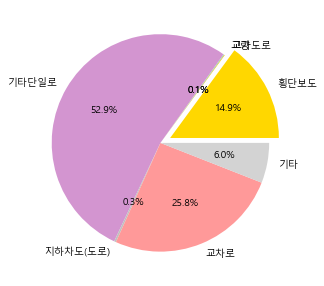

In [16]:
result = [crossroads, goga, bridge, singleroad, underpass, intersections, etcroads]
roadType = '횡단보도', '고가도로', '교량', '기타단일로', '지하차도(도로)', '교차로', '기타'
colors = ['gold', '#ffc000', '#8fd9b6', '#d395d0', 'silver', '#ff9999', 'lightgray']
explode = [0.1, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(5,5))
plt.pie(result,labels=roadType, autopct='%.1f%%', colors=colors, explode=explode)
plt.show()

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x155ae44d580>,
 [Text(0.6534616943450918, 1.0064729574229214, '횡단보도'),
  Text(-0.4539122135573937, 1.0019798912071176, '고가도로'),
  Text(-0.46852357560938135, 0.9952314600625326, '교량'),
  Text(-0.4953905054170982, 0.9821345361724085, '지하차도(도로)'),
  Text(-0.8880228624705616, -0.6491651528922283, '교차로'),
  Text(1.0143877292701404, -0.4254615549096869, '기타')],
 [Text(0.38118598836797024, 0.5871092251633708, '31.7%'),
  Text(-0.2475884801222147, 0.5465344861129732, '0.2%'),
  Text(-0.25555831396875345, 0.5428535236704722, '0.3%'),
  Text(-0.2702130029547808, 0.5357097470031319, '0.6%'),
  Text(-0.48437610680212445, -0.35409008339576087, '54.6%'),
  Text(0.5533023977837129, -0.23206993904164738, '12.6%')])

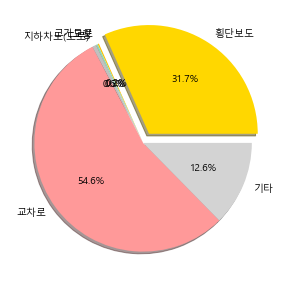

In [17]:
result = [crossroads, goga, bridge, underpass, intersections, etcroads]
roadType = '횡단보도', '고가도로', '교량', '지하차도(도로)', '교차로', '기타'
colors = ['gold', '#ffc000', '#8fd9b6', 'silver', '#ff9999', 'lightgray']
explode = [0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(5,5))
plt.pie(result,labels=roadType, autopct='%.1f%%', colors=colors, explode=explode, shadow=True)
plt.show()

In [18]:
# 가해자 법규위반 
# 과속
data_z = data_a.copy()
data_z = data_z[data_z['가해자법규위반']=='과속']
speed = data_z['발생일'].count()
speed

3

In [19]:
# 교차로 통행방법 위반
data_y = data_a.copy()
data_y = data_y[data_y['가해자법규위반']=='교차로 통행방법 위반']
cross = data_y['발생일'].count()
cross

4

In [20]:
# 기타
data_x = data_a.copy()
data_x = data_x[data_x['가해자법규위반']=='기타']
kita = data_x['발생일'].count()
kita

227

In [21]:
# 보행자 보호의무 위반
data_w = data_a.copy()
data_w = data_w[data_w['가해자법규위반']=='보행자 보호의무 위반']
mamoru = data_w['발생일'].count()
mamoru

674

In [22]:
# 신호위반
data_v = data_a.copy()
data_v = data_v[data_v['가해자법규위반']=='신호위반']
singo = data_v['발생일'].count()
singo

432

In [23]:
# 안전거리 미확보
data_u = data_a.copy()
data_u = data_u[data_u['가해자법규위반']=='안전거리 미확보']
kyouri = data_u['발생일'].count()
kyouri

2

In [24]:
# 안전운전 의무 불이행
data_t = data_a.copy()
data_t = data_t[data_t['가해자법규위반']=='안전운전 의무 불이행']
gimu = data_t['발생일'].count()
gimu

1816

In [25]:
# 중앙선 침범
data_s = data_a.copy()
data_s = data_s[data_s['가해자법규위반']=='중앙선 침범']
choukou = data_s['발생일'].count()
choukou

30

[2, 3, 4, 30, 227, 432, 674, 1816]

<Figure size 360x360 with 0 Axes>

Text(0.5, 0, '<서울시 교통사고 가해자 법규위법 유형>')

([<matplotlib.patches.Wedge at 0x155ae4d3e20>,
 [Text(1.0999978635848435, 0.0021679734270241206, '안전거리 미확보'),
  Text(1.0999738290089427, 0.007587851830747868, '과속'),
  Text(1.0998953172810813, 0.015175342604036813, '교차로 통행방법 위반'),
  Text(1.098769653934225, 0.05201199470567728, '중앙성 침범'),
  Text(1.0506878883874107, 0.3256608069694668, '기타'),
  Text(0.6398808172461944, 0.8947360167783248, '신호위반'),
  Text(-0.49726349221766053, 0.981187555622011, '보행자 보호의무 위반'),
  Text(-0.2604331434009315, -1.1713985563497635, '안전운전 의무 불이행')],
 [Text(0.5999988346826418, 0.0011825309601949747, '0.1%'),
  Text(0.5999857249139687, 0.004138828271317018, '0.1%'),
  Text(0.5999429003351351, 0.008277459602201897, '0.1%'),
  Text(0.5993289021459409, 0.028370178930369423, '0.9%'),
  Text(0.5731024845749512, 0.17763316743789095, '7.1%'),
  Text(0.34902590031610603, 0.48803782733363166, '13.6%'),
  Text(-0.2712346321187239, 0.5351932121574605, '21.1%'),
  Text(-0.15191933365054336, -0.683315824537362, '57.0%')])

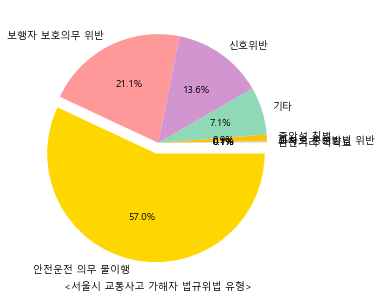

In [26]:
result2 = [speed, cross, kita, mamoru, singo, kyouri, gimu, choukou]
result2.sort()
result2
styleType = '안전거리 미확보', '과속', '교차로 통행방법 위반', '중앙성 침범', '기타', '신호위반', '보행자 보호의무 위반', '안전운전 의무 불이행'
colors = ['whitesmoke', 'silver' , 'lightgray', '#ffc000', '#8fd9b6', '#d395d0', '#ff9999',  'gold']
explode = [0, 0, 0, 0, 0, 0, 0, 0.1]
plt.figure(figsize=(5,5))
plt.xlabel('<서울시 교통사고 가해자 법규위법 유형>')
plt.pie(result2, autopct='%.1f%%', colors=colors, labels=styleType, explode=explode)
plt.show()

[2, 3, 4, 30, 227, 432, 674, 1816]

3188
result3 : [0.06273525721455457, 0.09410288582183186, 0.12547051442910914, 0.9410288582183186, 7.120451693851945, 13.55081555834379, 21.141781681304895, 56.96361355081556]


<Figure size 360x360 with 0 Axes>

Text(0.5, 0, '<서울시 교통사고 가해자 법규위법 유형>')

<BarContainer object of 8 artists>

(0.000, 60.000)

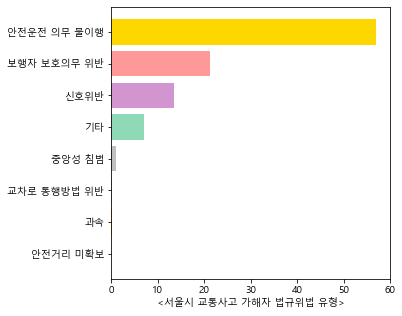

In [27]:
result2 = [speed, cross, kita, mamoru, singo, kyouri, gimu, choukou]
result2.sort()
result2
result_sum=0
for i in result2:
    result_sum += i
print(result_sum)
result3 = []
for j in result2:
    x = j/result_sum * 100
    result3.append(x)
print('result3 :', result3) 
styleType = ['안전거리 미확보', '과속', '교차로 통행방법 위반', '중앙성 침범', '기타', '신호위반', '보행자 보호의무 위반', '안전운전 의무 불이행']
colors = ['whitesmoke', '#ffc000' , 'lightgray', 'silver', '#8fd9b6', '#d395d0', '#ff9999',  'gold']

plt.figure(figsize=(5,5))
plt.xlabel('<서울시 교통사고 가해자 법규위법 유형>')
plt.barh(styleType, result3, color=colors)
plt.xlim([0,60])
plt.show()

[1816, 674, 432, 227, 30, 4, 3, 2]

3188
result3 : [56.96361355081556, 21.141781681304895, 13.55081555834379, 7.120451693851945, 0.9410288582183186, 0.12547051442910914, 0.09410288582183186, 0.06273525721455457]


<Figure size 360x360 with 0 Axes>

Text(0.5, 0, '<서울시 교통사고 가해자 법규위법 유형>')

<BarContainer object of 8 artists>

(0.000, 60.000)

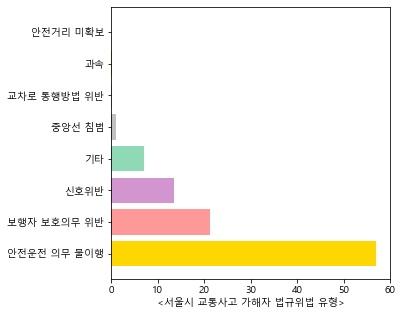

In [28]:
result2 = [speed, cross, kita, mamoru, singo, kyouri, gimu, choukou]
result2.sort(reverse=True)
result2
result_sum=0
for i in result2:
    result_sum += i
print(result_sum)
result3 = []
for j in result2:
    x = j/result_sum * 100
    result3.append(x)
print('result3 :', result3) 
styleType = ['안전운전 의무 불이행', '보행자 보호의무 위반', '신호위반', '기타', '중앙선 침범', '교차로 통행방법 위반', '과속', '안전거리 미확보']
colors = ['gold', '#ff9999', '#d395d0', '#8fd9b6', 'silver', 'lightgray', '#ffc000', 'whitesmoke']

plt.figure(figsize=(5,5))
plt.xlabel('<서울시 교통사고 가해자 법규위법 유형>')
plt.barh(styleType, result3, color=colors)
plt.xlim([0,60])
plt.show()

[1816, 674, 432, 227, 30, 4, 3, 2]

3188


,법규위법유형(%)
안전운전 의무 불이행,56.964
보행자 보호의무 위반,21.142
신호위반,13.551
기타,7.120
중앙선 침범,0.941
교차로 통행방법 위반,0.125
과속,0.094
안전거리 미확보,0.063


<Figure size 360x360 with 0 Axes>

(0.000, 70.000)

Text(57.53364, 0.0, '56.96 %')

Text(21.35342, 1.0, '21.14 %')

Text(13.68651, 2.0, '13.55 %')

Text(7.1912, 3.0, '7.12 %')

Text(0.95041, 4.0, '0.94 %')

Text(0.12625, 5.0, '0.12 %')

Text(0.09494, 6.0, '0.09 %')

Text(0.06363, 7.0, '0.06 %')

<Figure size 360x360 with 0 Axes>

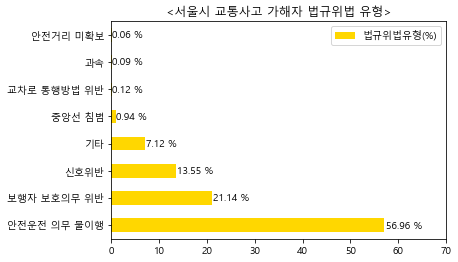

In [29]:
result2 = [speed, cross, kita, mamoru, singo, kyouri, gimu, choukou]
result2.sort(reverse=True)
result2
result_sum=0
for i in result2:
    result_sum += i
print(result_sum)
result3 = []
for j in result2:
    x = j/result_sum * 100
    result3.append(x)
# print('result3 :', result3) 
result4 = np.round(result3, 3)
# result4


styleType = ['안전운전 의무 불이행', '보행자 보호의무 위반', '신호위반', '기타', '중앙선 침범', '교차로 통행방법 위반', '과속', '안전거리 미확보']

df = pd.DataFrame(result4, index=styleType)
df.columns = ['법규위법유형(%)']
df

colors = ['gold', '#ff9999', '#d395d0', '#8fd9b6', 'silver', 'lightgray', '#ffc000', 'whitesmoke']

plt.figure(figsize=(5,5))
# plt.xlabel('<서울시 교통사고 가해자 법규위법 유형>')
ax = df.plot(kind='barh', title = '<서울시 교통사고 가해자 법규위법 유형>', rot = 0, color=colors)
plt.xlim([0,70])


for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f %%"%(width), va='center')

plt.sca(ax)
plt.show()

[1816, 674, 432, 227, 30, 4, 3, 2]

3188


,법규위법유형(%)
안전운전 의무 불이행,56.964
보행자 보호의무 위반,21.142
신호위반,13.551
기타,7.120
중앙선 침범,0.941
교차로 통행방법 위반,0.125
과속,0.094
안전거리 미확보,0.063


<Figure size 360x360 with 0 Axes>

(0.000, 70.000)

Text(0.5, 0, '<서울시 교통사고 가해자 법규위법 유형>')

Text(59, 0, '56.96%')

Text(23, 1, '21.14%')

Text(15, 2, '13.55%')

Text(9, 3, '7.12%')

Text(1.5, 4, '0.94%')

Text(1, 5, '0.12%')

Text(1, 6, '0.09%')

Text(1, 7, '0.06%')

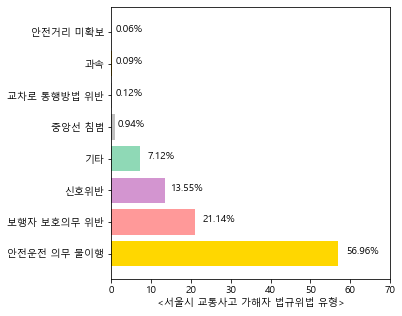

In [30]:
result2 = [speed, cross, kita, mamoru, singo, kyouri, gimu, choukou]
result2.sort(reverse=True)
result2
result_sum=0
for i in result2:
    result_sum += i
print(result_sum)
result3 = []
for j in result2:
    x = j/result_sum * 100
    result3.append(x)
# print('result3 :', result3) 
result4 = np.round(result3, 3)
# result4


styleType = ['안전운전 의무 불이행', '보행자 보호의무 위반', '신호위반', '기타', '중앙선 침범', '교차로 통행방법 위반', '과속', '안전거리 미확보']

df = pd.DataFrame(result4, index=styleType)
df.columns = ['법규위법유형(%)']
df

colors = ['gold', '#ff9999', '#d395d0', '#8fd9b6', 'silver', 'lightgray', '#ffc000', 'whitesmoke']

plt.figure(figsize=(5,5))
ax = plt.barh(styleType, result4, color=colors)
plt.xlim([0,70])
plt.xlabel('<서울시 교통사고 가해자 법규위법 유형>')


plt.text(59, 0, '56.96%')
plt.text(23, 1, '21.14%')
plt.text(15, 2, '13.55%')
plt.text(9, 3, '7.12%')
plt.text(1.5, 4, '0.94%')
plt.text(1, 5, '0.12%')
plt.text(1, 6, '0.09%')
plt.text(1, 7, '0.06%')


plt.show()

In [31]:
data_a

,발생일,발생시간,주야,요일,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
72,2015-01-03,20,야,토,0,2,0,0,서울,구로구,차대사람,횡단중,횡단중,보행자 보호의무 위반,단일로,횡단보도상,승용차,보행자
96,2015-01-05,9,주,월,0,0,0,1,서울,동작구,차대사람,횡단중,횡단중,신호위반,교차로,교차로내,승합차,보행자
107,2015-01-05,17,주,월,0,0,1,0,서울,금천구,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자
129,2015-01-06,15,주,화,0,0,1,0,서울,강남구,차대사람,횡단중,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자
137,2015-01-07,9,주,수,0,0,1,0,서울,구로구,차대사람,횡단중,횡단중,신호위반,단일로,횡단보도상,승용차,보행자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55382,2019-12-28,14,주,토,0,0,0,1,서울,마포구,차대사람,횡단중,횡단중,중앙선 침범,교차로,교차로부근,이륜차,보행자
55426,2019-12-30,6,주,월,0,0,0,1,서울,은평구,차대사람,횡단중,횡단중,신호위반,교차로,교차로횡단보도내,이륜차,보행자
55432,2019-12-30,13,주,월,0,0,1,0,서울,강남구,차대사람,기타,기타,기타,교차로,교차로부근,승용차,보행자
55454,2019-12-31,10,주,화,0,0,0,1,서울,강서구,차대사람,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,보행자


In [44]:
years = [2015, 2016, 2017, 2018, 2019]

data_year = data_a['발생일'].values.tolist()
data_year

['2015-01-03',
 '2015-01-05',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-09',
 '2015-01-10',
 '2015-01-12',
 '2015-01-14',
 '2015-01-14',
 '2015-01-14',
 '2015-01-14',
 '2015-01-15',
 '2015-01-15',
 '2015-01-16',
 '2015-01-17',
 '2015-01-17',
 '2015-01-19',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-21',
 '2015-01-22',
 '2015-01-22',
 '2015-01-22',
 '2015-01-22',
 '2015-01-23',
 '2015-01-23',
 '2015-01-26',
 '2015-01-26',
 '2015-01-27',
 '2015-01-27',
 '2015-01-28',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-01-31',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-07',
 '2015-02-07',
 '2015-02-07',
 '2015-02-08',
 '2015-02-08',
 '2015-02-08',
 '2015-02-08',
 '2015-02-09',
 '2015-02-10',
 '2015-02-10',
 '2015-02-12',
 '2015-02-12',
 '2015-02-12',
 '2015-02-13',
 '2015-02-13',
 '2015-02-13',
 '2015-02-14',
 '2015-02-16',
 '2015-02-17',
 '2015-02-17',
 '2015-02-21',
 '2015-02-22',
 '2015-02-23',
 '2015-02-

In [62]:
year_total = []
y2015 = 0
y2016 = 0
y2017 = 0
y2018 = 0
y2019 = 0
for i in data_year:
    year = i[0:4]
    if year == '2015':
        y2015 += 1
    elif year == '2016':
        y2016 += 1
    elif year == '2017':
        y2017 += 1
    elif year == '2018':
        y2018 += 1
    else:
        y2019 += 1
# print(y2015, y2016, y2017, y2018, y2019)

year_total.append(y2015)
year_total.append(y2016)
year_total.append(y2017)
year_total.append(y2018)
year_total.append(y2019)
year_total

[734, 652, 612, 558, 632]

([<matplotlib.axis.XTick at 0x155ae532a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '<2015-2019 안전운전 의무 불이행 변화>')

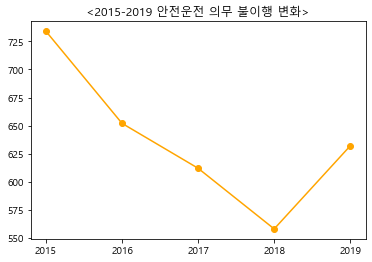

In [69]:
plt.plot(years, year_total, marker='o', color='orange')
plt.xticks([2015,2016,2017,2018,2019])
plt.title('<2015-2019 안전운전 의무 불이행 변화>')
plt.show()